# Allstate Auto Insurance Claim Prediction with XGBoost


## Contents
### 1. Data Description and Wrangling 
### 2. Fitting the Model
### 3. Conslusions 




In [49]:
#importing required packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost 
import xgboost as xgb
import time
from sklearn.preprocessing import LabelEncoder,PowerTransformer,QuantileTransformer

from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor


## 1. Data Description and Wrangling

In [27]:
#importing the train and submission data for Kaggle

data=pd.read_csv("/Users/miladsheikhlari/Downloads/allstate-claims-severity/train.csv")

# dropping the id column and separating ys and xs

data1=data.iloc[:,1:131]
y=data["loss"]

print(data1.head(),y.head())

  cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10    ...        cont5  \
0    A    B    A    B    A    A    A    A    B     A    ...     0.310061   
1    A    B    A    A    A    A    A    A    B     B    ...     0.885834   
2    A    B    A    A    B    A    A    A    B     B    ...     0.397069   
3    B    B    A    B    A    A    A    A    B     A    ...     0.422268   
4    A    B    A    B    A    A    A    A    B     B    ...     0.704268   

      cont6     cont7    cont8    cont9   cont10    cont11    cont12  \
0  0.718367  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646   
1  0.438917  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307   
2  0.289648  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424   
3  0.440945  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570   
4  0.178193  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213   

     cont13    cont14  
0  0.822493  0.714843  
1  0.611431  0.304496  
2  0.195709  0.774425  
3  0.605077  0

In [28]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 130 entries, cat1 to cont14
dtypes: float64(14), object(116)
memory usage: 186.8+ MB


The dataset consits of 130 columns corresponding to 10 features. 14 of the features are numerical and 116 are categorical values 

(array([1.08301e+05, 4.91050e+04, 1.79790e+04, 7.05100e+03, 3.05500e+03,
        1.41100e+03, 6.55000e+02, 3.23000e+02, 1.91000e+02, 8.80000e+01]),
 array([6.7000000e-01, 2.5000150e+03, 4.9993600e+03, 7.4987050e+03,
        9.9980500e+03, 1.2497395e+04, 1.4996740e+04, 1.7496085e+04,
        1.9995430e+04, 2.2494775e+04, 2.4994120e+04]),
 <a list of 10 Patch objects>)

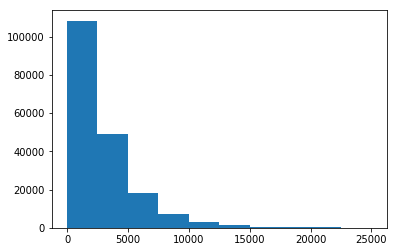

In [56]:
#the distribution of insurance claim

plt.hist(y[y<25000])

As expected the insurance claim amounts are right-skewed with mostly small claims and few large claims

In [29]:
# transformins the categorical columns

enc=LabelEncoder()


for i in range(len(data1.loc[:,data1.dtypes=='object'].columns)):
    data1.iloc[:,i]=enc.fit_transform(data1.iloc[:,i])


In [30]:
data1.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,1,0,1,0,0,0,0,1,0,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0,1,0,0,0,0,0,0,1,1,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0,1,0,0,1,0,0,0,1,1,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,1,1,0,1,0,0,0,0,1,0,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0,1,0,1,0,0,0,0,1,1,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


In [31]:
#splitting training and test sets

X_train, X_test, y_train, y_test = train_test_split(
        data1, y, test_size=0.2, random_state=42)


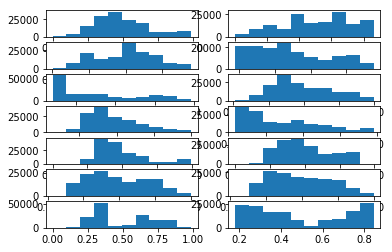

In [32]:
for i in range(14):
    plt.subplot(7,2,i+1)
    
    plt.hist(X_train.iloc[:,116+i])
    

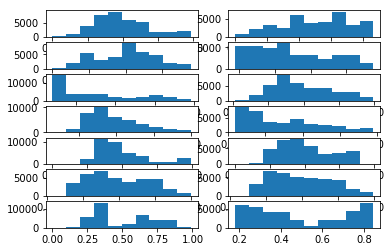

In [33]:
for i in range(14):
    plt.subplot(7,2,i+1)
    
    plt.hist(X_test.iloc[:,116+i])


The numerical features are all on the same scale (0,1). The distribution of these covariates suggest that our model might benifit from a trasformation

In [34]:
pt=QuantileTransformer()

X_train.iloc[:,116:] =pt.fit_transform(X_train.iloc[:,116:])
X_test.iloc[:,116:] =pt.fit_transform(X_test.iloc[:,116:])


/Users/miladsheikhlari/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/miladsheikhlari/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


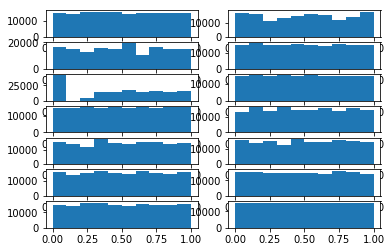

In [35]:
for i in range(14):
    plt.subplot(7,2,i+1)
    
    plt.hist(X_train.iloc[:,116+i])
    

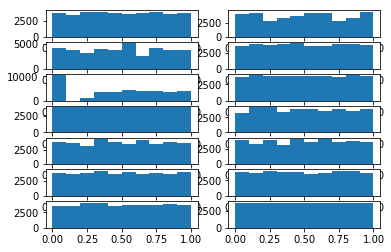

In [36]:
for i in range(14):
    plt.subplot(7,2,i+1)
    
    plt.hist(X_test.iloc[:,116+i])
    

## 2. Fitting the Model

Extreme Gradient Boosting (xgboost) is similar to gradient boosting framework but more efficient. It has both linear model solver and tree learning algorithms. So, what makes it fast is its capacity to do parallel computation on a single machine.

This makes xgboost at least 10 times faster than existing gradient boosting implementations. It supports various objective functions, including regression, classification and ranking. For this dataset since we are working with skewed insurance loss data the "tweedie" objective function seems a suitable choice.




In [58]:
# fitting a XGBoost model with Tweeide regression function

start = time.time()
model1=xgb.XGBRegressor(objective='reg:tweedie',seed =42)
model1.fit(X_train,y_train)
prediction1=model1.predict(X_test)
MAE1=mean_absolute_error(y_test,prediction1)
print(MAE1)
end = time.time()
print("Execution time: ",(end - start),"seconds")

1258.9682991073205
Execution time:  106.57068514823914 seconds


As we can see this algorithms results in a mean absolute error of 1258 in around a minute and half. Note that using the linear objective function enables us to tune the model parameters to produce better results. The number of trees used in the algorithm has a great impact on reducing the mae and increasing the number of trees results in lower mae. However this comes at a cost to computation time.

We could also use a Generalized Linear Model with the Tweedie family of distribution. The Tweedie distribution is a compound possoin distribution used in the insurance industry. It takes a  variance-power parameter(p) that falls in the (1,2) . The shape of the distribution gets closer to the Gamma as p approaches 2 and to the Possoin distribution as p approaches 1.

The histogram of our claim data looks closer to the poisson distribution and therefore I have chosen p to be 1.03

In [59]:
In [1]: import statsmodels.api as sm

start = time.time()

GLM= sm.GLM(y_train,X_train, family=sm.families.Tweedie(var_power=1.03))
model2=GLM.fit()
print(model2.summary())
end = time.time()
print("Execution time: ",(end - start),"seconds")

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   loss   No. Observations:               150654
Model:                            GLM   Df Residuals:                   150524
Model Family:                 Tweedie   Df Model:                          129
Link Function:                    log   Scale:              1386.8454207853094
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 03 Jul 2019   Deviance:                   1.1350e+08
Time:                        11:29:15   Pearson chi2:                 2.09e+08
No. Iterations:                     7                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cat1          -0.2125      0.006    -35.982      0.000      -0.224      -0.201
cat2           0.1708      0.012     14.780      0.0

In [61]:
prediction2=model2.predict(X_test)
MAE2=mean_absolute_error(y_test,prediction2)
print(MAE2)


1313.968899393942


As we can see the mae using the GLM is 1313 which is higher than the mae from the XGBoost algorithms however the computation time is less. 

## 3. Conclusions

The XGBoost algorithm has recently gained lots of attention in the world of data science. It is one of the most used algorithms in data science competitions. It is a fast algorithms with a high predictive power. However the traditional actuarial approach using GLMs for insurance data should not be overlooked. Data Science took time to embrace Actuaries practices. On the other end, Actuaries have resisted to Machine Learning innovations. We can  observe interest on both sides and that more Machine Learning algorithms support features that are essential for Actuaries but also useful for Data
Scientists.